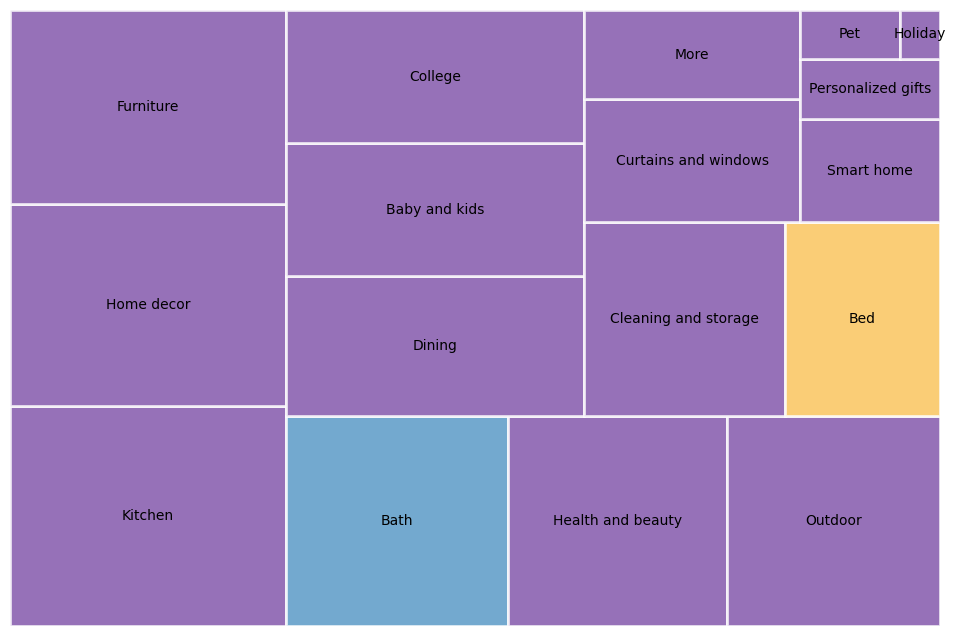

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 

df = pd.read_csv('bbb.csv')

category_totals = df.groupby('category')['value'].sum().sort_values(ascending=False).reset_index()

colors = ['#5094c3' if category == 'Bath' else '#f9c154' if category == 'Bed' else '#7c4ea6' 
          for category in category_totals['category']]

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.axis('off')

squarify.plot(sizes=category_totals['value'], 
              label=category_totals['category'], 
              color=colors, 
              alpha=0.8, 
              edgecolor='white', 
              linewidth=2)

plt.show()

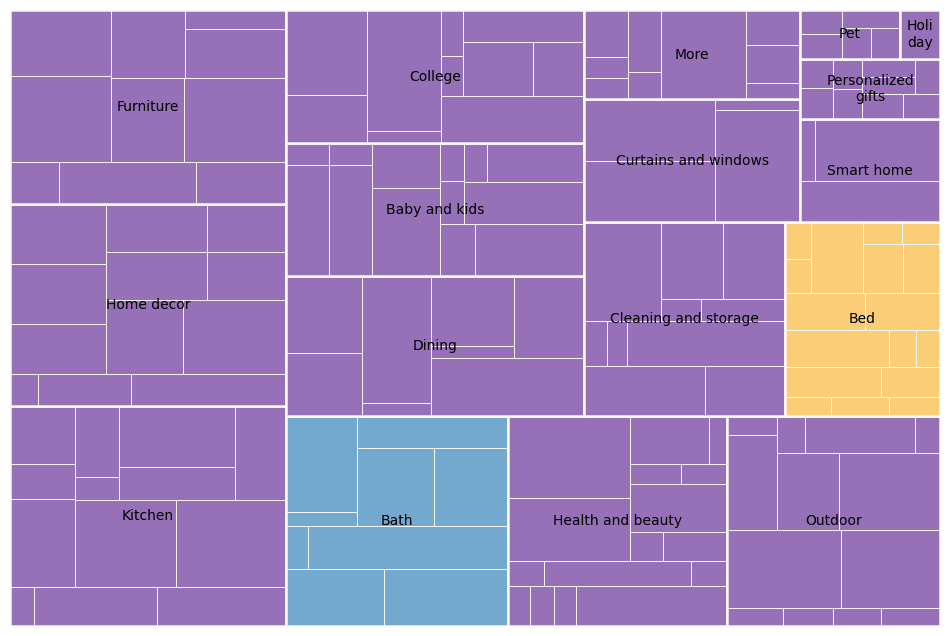

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import textwrap

df = pd.read_csv('bbb.csv')

category_totals = df.groupby('category')['value'].sum().sort_values(ascending=False).reset_index()

colors = ['#5094c3' if category == 'Bath' else '#f9c154' if category == 'Bed' else '#7c4ea6' 
          for category in category_totals['category']]

def add_wrapped_text(ax, x, y, dx, dy, text, fontsize=9, color='black'):
    wrap_width = max(1, int(dx / (fontsize * 0.1)))
    wrapped_text = textwrap.fill(text, wrap_width)
    ax.text(x + dx / 2, y + dy / 2, wrapped_text, ha='center', va='center', fontsize=fontsize, color=color)
    
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.axis('off')

total_value = df['value'].sum()
normalized_sizes = (category_totals['value'] / total_value * 100 * 100).tolist()

top_level_rects = squarify.squarify(normalized_sizes, 0, 0, 100, 100)

squarify.plot(sizes=category_totals['value'], 
              color=colors, 
              alpha=0.8, 
              edgecolor='white', 
              linewidth=2)

for rect, label in zip(top_level_rects, category_totals['category']):
    add_wrapped_text(ax, rect['x'], rect['y'], rect['dx'], rect['dy'], label, fontsize=10)
    

for i, (category, total) in enumerate(zip(category_totals['category'], category_totals['value'])):
    items = df[df['category'] == category]
    item_normalized_sizes = (items['value'] / total * top_level_rects[i]['dx'] * top_level_rects[i]['dy']).tolist()

    item_rects = squarify.squarify(item_normalized_sizes, top_level_rects[i]['x'], top_level_rects[i]['y'], top_level_rects[i]['dx'], top_level_rects[i]['dy'])

    for item_rect in item_rects:
        x, y, dx, dy = item_rect['x'], item_rect['y'], item_rect['dx'], item_rect['dy']
        ax.add_patch(plt.Rectangle((x, y), dx, dy, edgecolor='white', facecolor='none', linewidth=0.5))

plt.show()

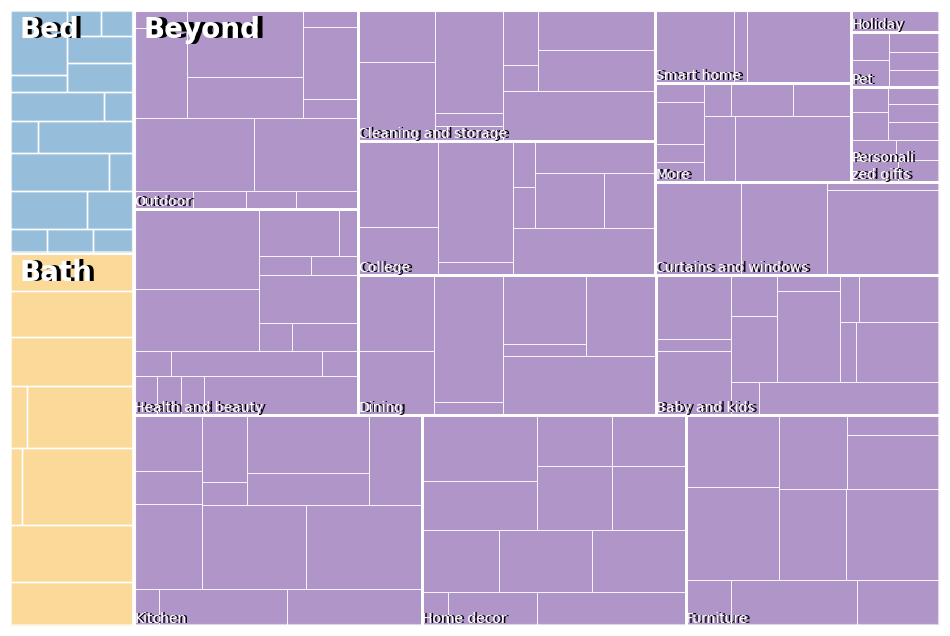

In [ ]:
def add_text_with_shadow(ax, rect, text, fontsize=20, color='white', shadow_color='black', valign='top'):
    x, y = rect['x'], rect['y']
    text_x = x + 1
    text_y = y + 1
    ax.text(text_x + 0.5, text_y, text, fontsize=fontsize, fontweight='bold', color=shadow_color,
            ha='left', va=valign)
    ax.text(text_x, text_y, text, fontsize=fontsize, fontweight='bold', color=color,
            ha='left', va=valign)

def add_wrapped_text(ax, x, y, dx, dy, text, fontsize=9, color='white', shadow_color='black'):
    wrap_width = max(1, int(dx / (fontsize * 0.1)))
    wrapped_text = textwrap.fill(text, wrap_width)
    ax.text(x + 0.3, y + 0.3, wrapped_text, fontsize=fontsize, color=shadow_color, ha='left', va='bottom')
    ax.text(x, y + 0.3, wrapped_text, fontsize=fontsize, color=color, ha='left', va='bottom')

fixed_font_size = 9    
colors = ['#f9c154', '#5094c3', '#7c4ea6']

df['top_level'] = df['category'].apply(lambda x: 'Bed' if 'Bed' in x else ('Bath' if 'Bath' in x else 'Beyond'))
top_level_totals = df.groupby('top_level')['value'].sum().reset_index()

total_value = top_level_totals['value'].sum()
total_area = 100 * 100 
top_sizes = (top_level_totals['value'] / total_value * total_area).tolist()

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

top_rects = squarify.squarify(top_sizes, 0, 0, 100, 100)

squarify.plot(ax=ax, sizes=top_sizes, label=None, color=colors, alpha=0.6, edgecolor='white', linewidth=3)

for rect, cat in zip(top_rects, top_level_totals['top_level']):
    add_text_with_shadow(ax, rect, cat)

beyond_rect = top_rects[top_level_totals[top_level_totals['top_level'] == 'Beyond'].index[0]]
beyond_data = df[df['top_level'] == 'Beyond']
beyond_categories = beyond_data.groupby('category')['value'].sum().reset_index().sort_values(by='value',
                                                                                              ascending=False)

beyond_sizes = squarify.normalize_sizes(beyond_categories['value'], beyond_rect['dx'], beyond_rect['dy'])
beyond_rects = squarify.squarify(beyond_sizes, beyond_rect['x'], beyond_rect['y'], beyond_rect['dx'], beyond_rect['dy'])

for rect, cat in zip(beyond_rects, beyond_categories['category']):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax.add_patch(plt.Rectangle((x, y), dx, dy, edgecolor='white', facecolor='none', linewidth=2))
    add_wrapped_text(ax, x, y, dx, dy, cat, fontsize=fixed_font_size)

for i, (cat, rect) in enumerate(zip(beyond_categories['category'], beyond_rects)):
    sub_data = df[(df['top_level'] == 'Beyond') & (df['category'] == cat)]
    sub_sizes = squarify.normalize_sizes(sub_data['value'], rect['dx'], rect['dy'])
    sub_rects = squarify.squarify(sub_sizes, rect['x'], rect['y'], rect['dx'], rect['dy'])

    for sub_rect in sub_rects:
        x, y, dx, dy = sub_rect['x'], sub_rect['y'], sub_rect['dx'], sub_rect['dy']
        ax.add_patch(
            plt.Rectangle((x, y), dx, dy, edgecolor='white', facecolor='none', linewidth=0.5))
        
for i, (top_cat, top_rect) in enumerate(zip(top_level_totals['top_level'], top_rects)):
    if top_cat == 'Beyond':
        continue

    sub_data = df[df['top_level'] == top_cat]
    sub_sizes = squarify.normalize_sizes(sub_data['value'], top_rect['dx'], top_rect['dy'])
    sub_rects = squarify.squarify(sub_sizes, top_rect['x'], top_rect['y'], top_rect['dx'], top_rect['dy'])
    
    for sub_rect in sub_rects:
        x, y, dx, dy = sub_rect['x'], sub_rect['y'], sub_rect['dx'], sub_rect['dy']
        ax.add_patch(plt.Rectangle((x, y), dx, dy, edgecolor='white', facecolor='none', linewidth=1))

plt.show()